# Introduction to the Simulation/Modelling Cross-Border Payment Transactions

This is a short introduction to a quick model of how money can be transferred between accounts in the auction-based system outlined throughout the paper. The encoded simulation below utilizes an exchange platform between three different countries and three different currencies, which can be visualized in the matrices shown below.



> **Note**: The code below organizes countries into three separate matrices. Each row represents a different currency (in this case, the order is USD, EUR, and JPY) while the first column represents the current concentration of currency/desired concentration of currency and the second column represents the final allocation of currency after the exchange is performed. In the sample matrices below, the theory of the exhchange can be observed prior to running the simulation through the code.

## Establishing the Price Matrix 🧪

**PriceMatrix** is a class dedicated to the structure of each country's current capital in the system across currency both prior to and after the exchange takes place. In the diagram below, we can observe how data is structured for Country 1 (c1 in the code) in the image below. 

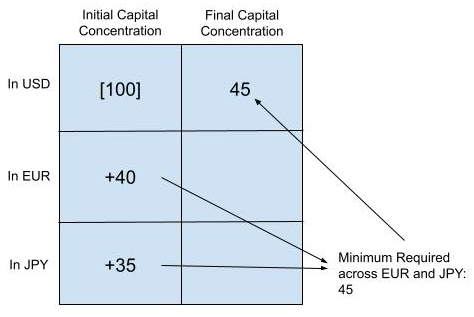

We can also observe the matrices for Countries 2 and 3, labeled c2 and c3 respectively in the code, below: 

In the case of c2, the 50 represents the minimum requirement acroos USD and JPY

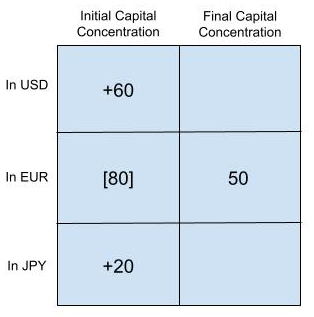 

In the case of c3, the 50 represents the minimum requirement acroos USD and EUR

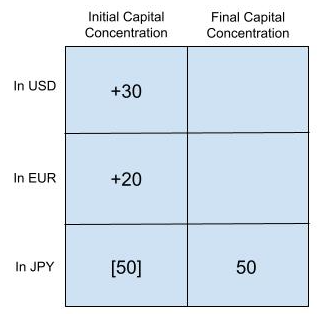

## Encoding the Price Matrix Class 📓

**Price Matrices** are encoded as a series of 2-dimensional arrays, wherein there are specific methods dedicated to filling in the values of the individual countries (given that they are operating with different currency trades). The methods themselves are labeled/commented for their individual purposes, and can be observed in the code cell below:

In [9]:
class PriceMatrix:
    
    def __init__(self):
    #Method for initializing the structure of the initial price matrix
        self.price_matrix = [0, 0, 0]
        i = 0
        while i < 3:
            internal_matrix = [0, 0]
            self.price_matrix[i] = internal_matrix
            i += 1

    def fill_c1_matrix(self, row_num_list):
    #Fills the matrix for the first country (c1) on the basis of numbers inputted
        i = 0
        for num in row_num_list:
            if i < 2:
                self.price_matrix[0][i] = num
            elif i == 2:
                self.price_matrix[1][0] = num
            else:
                self.price_matrix[2][0] = num
            i += 1

    def fill_c2_matrix(self, row_num_list):
    #Fills the matrix for the second country (c2) on the basis of numbers inputted
        i = 0
        for num in row_num_list:
            if i == 0:
                self.price_matrix[0][0] = num
            elif i == 3:
                self.price_matrix[2][0] = num
            else:
                self.price_matrix[1][i-1] = num
            i += 1

    def fill_c3_matrix(self, row_num_list):
    #Fills the matrix for the third country (c3) on the basis of numbers inputted
        i = 0
        for num in row_num_list:
            if i == 0:
                self.price_matrix[0][0] = num
            elif i == 1:
                self.price_matrix[1][0] = num
            elif i == 2:
                self.price_matrix[2][0] = num
            elif i == 3:
                self.price_matrix[2][1] = num
            i += 1

    def replace_value(self, value, row, col):
    #Replaces any given value within any of the price matrices
        for i in range(len(self.price_matrix)):
            for j in range(len(self.price_matrix[i])):
                if i == row and j == col:
                    self.price_matrix[i][j] = value

    def __str__(self):
    #Creates the parameters for the visual output of a price matrix
        return '\n'.join([''.join(['{:2}'.format(item) for item in row]) 
      for row in self.price_matrix])

## Using the simulation 

This explanation will take the users through how to best utilize the code presented in this notebook. 

### Entering input values for the respective countries
 
The first step are the sections of code that hope to take information from the individual users that are in the three player system. For the purposes of filling out the matrix, we need four numbers from each user. In this case, we ask for a few values from the first country, including the desired amount of money willing to be traded in the main currency, the minimum desired across the two non-trading currencies, and finally the current amounts of currency across the non-trading currencies. The ratio that is calculated across each country is utilized in order to prioritize how the actual currency will be distributed in the later steps (see below sections). You can enter the values for the first currencies below:


In [10]:
if __name__ == '__main__':
    c1_offer = float(input("Enter the amount of usd willing to be traded: "))
    c1_minimum = float(input("Enter the price minimum: "))
    c1_leftover1 = float(input("Enter the desired amount of euros: "))
    c1_leftover2 = float(input("Enter the desired amount of yen: "))
    c1_euro_ratio = float(c1_leftover1) / (float(c1_leftover1) + float(c1_leftover2))
    c1_yen_ratio = float(c1_leftover2) / (float(c1_leftover1) + float(c1_leftover2))
    c1_pricematrix = PriceMatrix()
    num_list1 = [c1_offer, c1_minimum, c1_leftover1, c1_leftover2]
    c1_pricematrix.fill_c1_matrix(num_list1)
    

<class 'TypeError'>: float() argument must be a string or a real number, not 'Future'

The second country's values can be entered below:

In [11]:
    c2_offer = float(input("Enter the amount of euros willing to be traded: "))
    c2_minimum = float(input("Enter the price minimum: "))
    c2_leftover1 = float(input("Enter the desired amount of dollars: "))
    c2_leftover2 = float(input("Enter the desired amount of yen: "))
    c2_usd_ratio = float(c2_leftover1) / (float(c2_leftover1) + float(c2_leftover2))
    c2_yen_ratio = float(c2_leftover2) / (float(c2_leftover1) + float(c2_leftover2))
    c2_pricematrix = PriceMatrix()
    c2_pricematrix.fill_c2_matrix([c2_leftover1, c2_offer, c2_minimum, c2_leftover2])

<class 'TypeError'>: float() argument must be a string or a real number, not 'Future'

The third country's values can be entered below:

In [12]:
    c3_offer = float(input("Enter the amount of yen willing to be traded: "))
    c3_minimum = float(input("Enter the price minimum: "))
    c3_leftover1 = float(input("Enter the desired amount of dollars: "))
    c3_leftover2 = float(input("Enter the desired amount of euros: "))
    c3_usd_ratio = float(c3_leftover1) / (float(c3_leftover1) + float(c3_leftover2))
    c3_euro_ratio = float(c3_leftover2) / (float(c3_leftover1) + float(c3_leftover2))
    c3_pricematrix = PriceMatrix()
    c3_pricematrix.fill_c3_matrix([c3_leftover1, c3_leftover2, c3_offer, c3_minimum])

<class 'TypeError'>: float() argument must be a string or a real number, not 'Future'

### Maximizing and optimizing for the amount of money exchanged
 
Here we calculate the worst-case demand and build the parameter numbers in order to encourage an optimization of supply, while also tracking the final balance for each currency.

In [13]:
    yen_demand = c1_minimum + c2_minimum
    usd_demand = c2_minimum + c3_minimum
    euro_demand = c1_minimum + c3_minimum

    yen_available = c3_offer
    usd_available = c1_offer
    euro_available = c2_offer

    c1_final_balance = [0, usd_available, 0]
    c2_final_balance = [0, 0, euro_available]
    c3_final_balance = [yen_available, 0, 0]

<class 'NameError'>: name 'c1_minimum' is not defined

### Prompting the optimization of the concentration of capital in the system
 
Here we prompt the user to insert more money into the system via a calculation in the difference between the supply and demand in the exchange network. Utilizing this new information, we recalculate the balance in the system and proceed with the exchange accordingly. 

In [14]:
    if yen_available < yen_demand:
        difference1 = yen_demand - yen_available
        print(str(difference1) + " more yen needs to be placed into the system to maximize the amount of money in the system.")
        c3_offer = input("Enter the additional amount of yen willing to be traded")
        yen_available = yen_available + float(c3_offer)

    if usd_available < usd_demand:
        difference2 = usd_demand - usd_available
        print(str(difference2) + " more usd needs to be placed into the system to maximize the amount of money in the system.")
        c1_offer = input("Enter the additional amount of usd willing to be traded")
        usd_available = usd_available + float(c1_offer)

    if euro_available < euro_demand:
        difference3 = euro_demand - euro_available
        print(str(difference3) + " more euros needs to be placed into the system to maximize the amount of money in the system.")
        c2_offer = input("Enter the additional amount of euros willing to be traded")
        euro_available = euro_available + float(c2_offer)

<class 'NameError'>: name 'yen_available' is not defined

### Prioritizing the distribution of currency
 
Through calculating the ratio priority of certain currencies, we are able to calculate the order in which we distribute currency and prioritize the placement of certain currencies in each individual country's price matrix. Utilizing this method, we are able to place the most desired currencies into the nations with the highest "ratio" of demand for the aforementioned currency.

In [15]:
    if c1_yen_ratio >= c2_yen_ratio:
        c1_final_balance[0] = c1_leftover2
        c2_final_balance[0] = c2_leftover2
        yen_available = yen_available - c1_leftover2 - c2_leftover2
    else:
        c2_final_balance[0] = c2_leftover2
        c1_final_balance[0] = c1_leftover2
        yen_available = yen_available - c2_leftover2 - c1_leftover2


    if c2_usd_ratio >= c3_usd_ratio:
        c2_final_balance[1] = c2_leftover1
        c3_final_balance[1] = c3_leftover1
        usd_available = usd_available - c2_leftover1 - c3_leftover1
    else:
        c3_final_balance[1] = c3_leftover1
        c2_final_balance[1] = c2_leftover1
        usd_available = usd_available - c3_leftover1 - c2_leftover1


    if c1_euro_ratio >= c3_euro_ratio:
        c1_final_balance[2] = c1_leftover1
        c3_final_balance[2] = c3_leftover2
        euro_available = euro_available - c1_leftover1 - c3_leftover2
    else:
        c3_final_balance[2] = c3_leftover2
        c1_final_balance[2] = c1_leftover1
        euro_available = euro_available - c3_leftover2 - c1_leftover1

<class 'NameError'>: name 'c1_yen_ratio' is not defined

### Printing the final price matrix
 
In these lines we display the final price matrix (in the same structures as the diagram in the beginning of the notebook) for c1 below. We replace the values with the new currency balance, and create an output to show the product of the self-sustaining exchange network!! It becomes rearranged to the following image: 
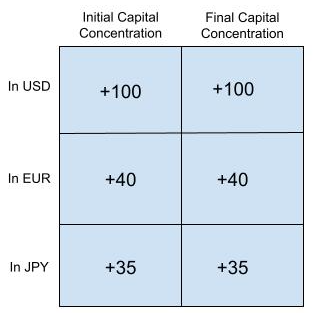

In [16]:
    c1_pricematrix.replace_value(c1_final_balance[1], 0, 1)
    c1_pricematrix.replace_value(c1_final_balance[2], 1, 1)
    c1_pricematrix.replace_value(c1_final_balance[0], 2, 1)
    print(c1_pricematrix)

<class 'NameError'>: name 'c1_pricematrix' is not defined

In these lines we display the final price matrix (in the same structures as the diagram in the beginning of the notebook) for c2 below. It becomes rearranged to the following image:  
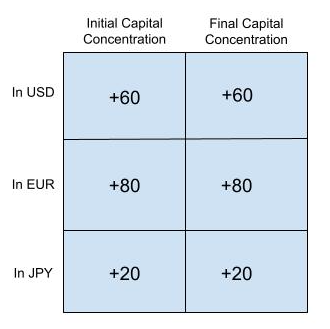

In [17]:
    c2_pricematrix.replace_value(c2_final_balance[1], 0, 1)
    c2_pricematrix.replace_value(c2_final_balance[2], 1, 1)
    c2_pricematrix.replace_value(c2_final_balance[0], 2, 1)
    print(c2_pricematrix)

<class 'NameError'>: name 'c2_pricematrix' is not defined

In these lines we display the final price matrix (in the same structures as the diagram in the beginning of the notebook) for c3 below. It becomes rearranged to the following image:  
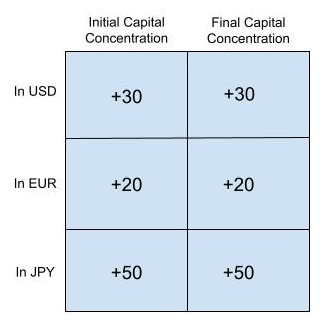

In [18]:
    c3_pricematrix.replace_value(c3_final_balance[1], 0, 1)
    c3_pricematrix.replace_value(c3_final_balance[2], 1, 1)
    c3_pricematrix.replace_value(c3_final_balance[0], 2, 1)
    print(c3_pricematrix)

<class 'NameError'>: name 'c3_pricematrix' is not defined